In [1]:
import cv2
import numpy as np
from utils.image_transform import transform_color
from utils.kmeans import kmeans_image

In [9]:
#im = cv2.imread('E:/polar/code/ponds_extended_data/4.png', 0)
print(im.shape)

im = cv2.imread('E:/polar/code/data/ir/entire/original_size/msks/9.png', 0)

#im = kmeans_image(im, save_path='E:/test/6.png', mode='gray')

#im = transform_color(im)

im[im==254] = 255
im[im==155] = 76

print(np.unique(im))

cv2.imwrite('E:/polar/code/data/ir/entire/original_size/msks/9.png', im)

"""
im[im==156] = 155
im[im==238] = 155
im[im==248] = 254
im[im==155] = 76
im[im==254] = 255
im[im==20] = 0

print(np.unique(im))
cv2.imwrite('E:/polar/code/data/ir/entire/original_size/msks/8.png', im)
"""

(2345, 2345)
[  0  76 255]


"\nim[im==156] = 155\nim[im==238] = 155\nim[im==248] = 254\nim[im==155] = 76\nim[im==254] = 255\nim[im==20] = 0\n\nprint(np.unique(im))\ncv2.imwrite('E:/polar/code/data/ir/entire/original_size/msks/8.png', im)\n"

In [2]:
import sys
print(sys.executable)

c:\Users\marle\miniconda3\envs\sea_ice\python.exe


### Point Extraction (Prompt Preparation SAM)

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure

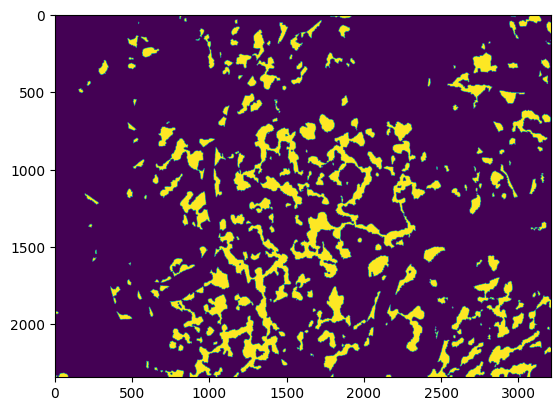

In [19]:
sample_mask = cv2.imread("E:/polar/code/data/ir/entire/original_size/msks_extended/0.png", 0)
sample_mask[sample_mask==255] = 76
sample_mask[sample_mask==0] = 255
sample_mask[sample_mask==76] = 0

plt.imshow(sample_mask)

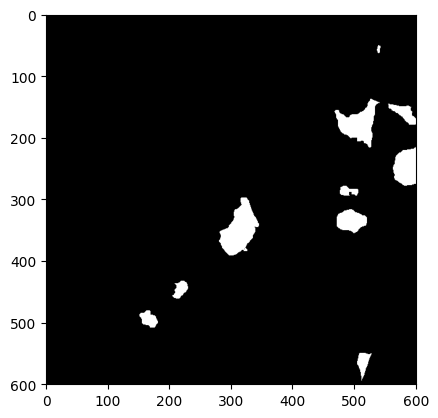

In [20]:
regions = measure.regionprops(sample_mask)
print(regions)

fig, ax = plt.subplots()
ax.imshow(sample_mask, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    ax.plot(x0, y0, '.g', markersize=15)

ax.axis((0, 600, 600, 0))
plt.show()

In [15]:
sample_mask = cv2.imread("E:/polar/code/data/ir/entire/original_size/msks_extended/0.png", 0)
sample_mask[sample_mask==76] = 255

print(np.unique(sample_mask))

# Connected component labeling
_, _, _, centroids = cv2.connectedComponentsWithStats(sample_mask)
print(centroids)

print(centroids[0,0])

for i in centroids:
    sample_mask[int(i[0]), int(i[1])] = 76

plt.imshow(sample_mask)

"""
# Find contours and extract points
for label in range(1, labels.max() + 1):  # Start from 1 to skip background label
    mask = (labels == label).astype('uint8')
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract points from the contour (you can adjust this based on your needs)
    contour_points = contours[0]  # Assuming there's only one contour per instance
    for point in contour_points:
        x, y = point[0]
        print(f"Instance {label}: ({x}, {y})")
"""


[  0 255]
[[1773.61001426 1348.60678891]
 [1576.998377   1142.92480283]
 [1760.            0.        ]
 [ 322.          381.        ]
 [1494.67479675  782.41463415]
 [1529.7079646   882.07964602]
 [2256.18360656 1067.6557377 ]
 [2224.54789272 1115.74712644]
 [1659.35249366 1518.93913779]
 [1075.33333333 1517.        ]
 [1770.72580645 1603.79316888]
 [1194.78021978 1616.73626374]
 [2291.46703297 1665.25824176]
 [1768.85314685 1671.66433566]
 [ 796.98795181 1867.06024096]
 [ 807.68727273 1887.56      ]
 [1318.38592375 2190.88093842]
 [3032.93584906 2328.15924528]
 [2958.14546525 2333.22202591]
 [ 751.57017544 2322.84210526]
 [2886.06703911 2335.3575419 ]]
1773.6100142635587


IndexError: index 3032 is out of bounds for axis 0 with size 2345

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
ponds_coords = []

for i in range(points.shape[0]):
    for j in range(points.shape[1]):
        if points[i,j] == 130:
            ponds_coords.append([i,j])

In [1]:
import os
from utils.patch_extraction import patch_extraction
import numpy as np

In [11]:
ims_256 = np.load("E:/polar/code/sam/arrays/256_ims_extended.npy")
mas = np.load("E:/polar/code/sam/arrays/256_mas_extended.npy")

In [6]:
print(np.unique(mas))

mas[mas==0] = 3
mas[mas==1] = 0
mas[mas==2] = 0
mas[mas==3] = 1

print(np.unique(mas))

np.save("E:/polar/code/sam/arrays/256_mas_extended_binary", mas)

[0 1 2]
[0 1]


In [2]:
ims = np.load("E:/polar/code/data/ir/entire/original_size/ims_raw_np_test/480_im.npy")
mas = np.load("E:/polar/code/data/ir/entire/original_size/ims_raw_np_test/480_ma.npy")

In [3]:
ims_256, mas_256 = patch_extraction(ims, mas, 256, 224)

In [4]:
np.save("E:/polar/code/sam/256_im_test.npy", ims_256)
np.save("E:/polar/code/sam/256_ma_test.npy", mas_256)

In [6]:
import random

def generate_random_points(image, prob):
    '''
    Add random points to image. Point density can be controlled by the prob parameter.
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [7]:
points_list = []

for f in mas:  
    out = generate_random_points(f, 0.01)
    points_list.append(out)

points_np = np.array(points_list)

In [8]:
# positive : 75
# negative : 255

points_mod_list = []

for idx, f in enumerate(points_np):
    print(f.shape)
    print(np.unique(f))
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            # eliminate border points
            if f[i,j] == 255 and i != 255 and j != 255:
                # if all four (direct) neighbours are ponds, label as positive
                # (disregard border pixels of a class, because those are sometimes too noisy)
                if f[i+1,j] == 1 and f[i,j+1] == 1 and f[i-1,j] == 1 and f[i,j-1] == 1:
                    points_np[idx,i,j] = 255
                elif f[i+1,j] == 0 and f[i,j+1] == 0 and f[i-1,j] == 0 and f[i,j-1] == 0:
                    points_np[idx,i,j] = 125
                else:
                    points_np[idx,i,j] = mas[idx,i,j]
            else:
                points_np[idx,i,j] = mas[idx,i,j]

    points_mod_list.append(points_np[idx])

points_mod_np = np.array(points_mod_list)

(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   1   2 255]
(256, 256)
[  0   

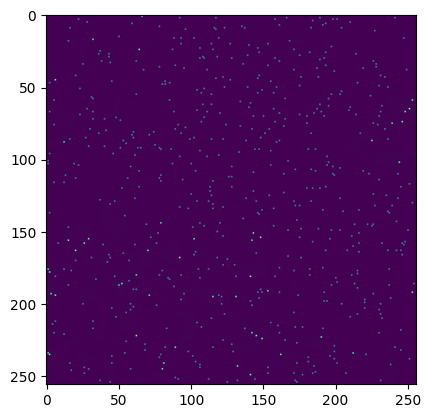

In [11]:
plt.imshow(points_mod_np[1])

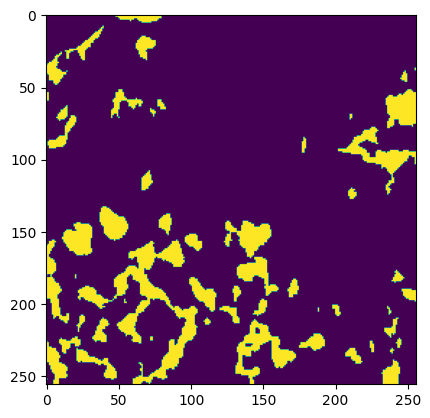

In [12]:
plt.imshow(mas[1])

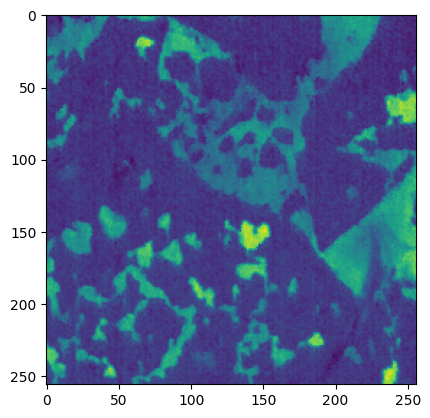

In [24]:
plt.imshow(ims_256[1])

In [14]:
import numpy as np

rgb= np.stack((points_mod_np,) * 3, axis=-1)
print(rgb.shape)

target_color = np.array([125, 125, 125])
replacement_color = np.array([255, 0, 0])

# Create a mask for pixels that match the target color
mask = np.all(rgb == target_color, axis=-1)

# Replace matching pixels with the replacement color
rgb[mask] = replacement_color


target_color = np.array([255, 255, 255])
replacement_color = np.array([0,255,0])

# Create a mask for pixels that match the target color
mask = np.all(rgb == target_color, axis=-1)

# Replace matching pixels with the replacement color
rgb[mask] = replacement_color

cv2.imwrite("E:/polar/code/sam/figs/points.png", rgb[1])

(40, 256, 256, 3)


True

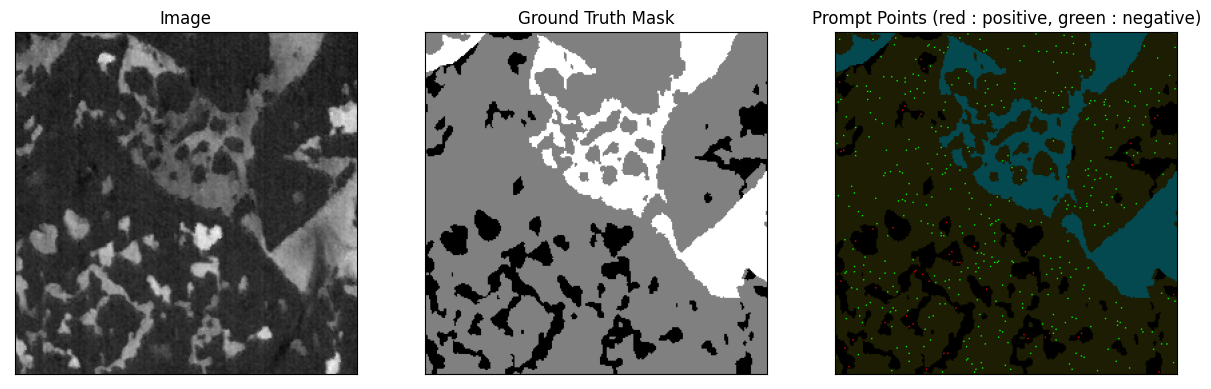

In [3]:
import matplotlib.pyplot as plt

ims_256 = np.load("E:/polar/code/sam/arrays/256_ims_extended.npy")
mas_256 = np.load("E:/polar/code/sam/arrays/256_mas_extended.npy")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(ims_256[1]), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(mas_256[1], cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Ground Truth Mask")

p = cv2.imread("E:/polar/code/sam/figs/mask_with_points.png")

# Plot the second image on the right
axes[2].imshow(p)  # Assuming the second image is grayscale
axes[2].set_title("Prompt Points (red : positive, green : negative)")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])



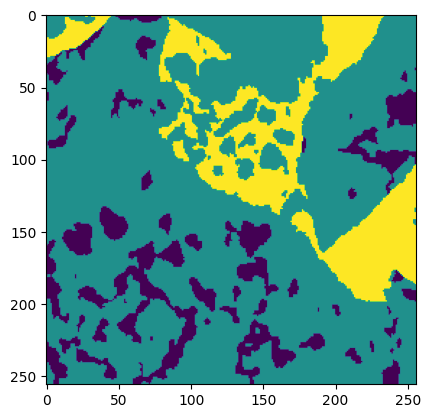

In [18]:
plt.imshow(mas_256[1])
plt.imsave("E:/polar/code/sam/figs/mask.png", mas_256[1])

In [16]:
np_path = "E:/polar/code/sam/arrays_dense/"

coord_pos = []
coord_neg = []

for idx, f in enumerate(points_mod_np):
    coord_pos = []
    coord_neg = []
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if f[i,j] == 255:
                coord_pos.append([i,j])
            elif f[i,j] == 125:
                coord_neg.append([i,j])
    coord_pos = np.array(coord_pos)
    coord_neg = np.array(coord_neg)
    nr_pos = coord_pos.shape[0]
    nr_neg = coord_neg.shape[0]
    tot = nr_pos + nr_neg
    print(tot)
    diff = tot - 450

    coord_new = coord_neg
    
    indices_to_delete = random.sample(range(coord_neg.shape[0]), diff)

    # Sort the indices in descending order so that we can delete elements from the end of the array first
    indices_to_delete.sort(reverse=True)

    # Delete elements from the array
    for index in indices_to_delete:
        coord_neg = np.delete(coord_neg, index, 0)

    np.save(os.path.join(np_path, '{}_256_pos.npy'.format(idx)), coord_pos)
    np.save(os.path.join(np_path, '{}_256_neg.npy'.format(idx)), coord_neg)

590
583
577
553
635
592
641
616
535
534
603
569
587
625
608
641
640
576
588
545
479
564
551
625
590
612
545
601
629
600
617
620
657
636
625
546
583
599
590
604


In [18]:
# masks to binary
multi = mas_256

print(np.unique(multi))
multi[multi==0] = 3
multi[multi==1] = 0
multi[multi==2] = 0
multi[multi==3] = 1
print(np.unique(multi))

np.save('E:/polar/code/sam/arrays/msks_256_bin.npy', multi)

[0 2]
[0 1]


0


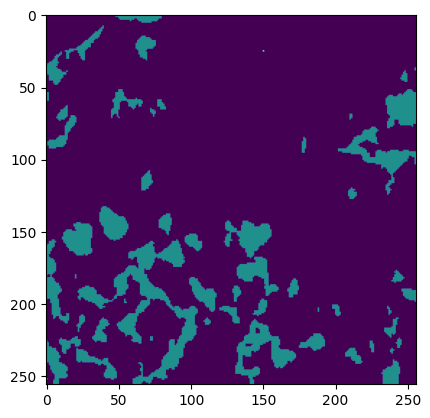

In [21]:

print(multi[1,25,150])
multi[1,25,150] = 2

plt.imshow(multi[1])

In [35]:
path_mask = 'E:/polar/code/data/ir/entire/original_size/msks_extended'
store_path = 'E:/polar/code/sam/prompts'
store_mask_path = 'E:/polar/code/sam/masks_small'
dual_path = 'E:/polar/code/sam/dual_prompts'

In [77]:
from utils.image_transform import resize_image, crop_center_square

orig_list = []
points_list = []

for f in os.listdir(path_mask):
    img = cv2.imread(os.path.join(path_mask, f), 0)
    img = resize_image(img)
    img = crop_center_square(img)
    orig_list.append(img)
    cv2.imwrite(os.path.join(store_mask_path, '{}'.format(f)), img)   
    # sea ice class
    img[img==76] = 1
    # ocean class
    img[img==255] = 2
    out = random_points(img, 0.003)
    points_list.append(out)
    cv2.imwrite(os.path.join(store_path, '{}'.format(f)), out)

In [31]:
print(np.unique(out))
print(np.unique(img))


[  0   1   2 255]
[0 1 2]


In [79]:
orig_array = np.array(orig_list)
points_array = np.array(points_list)

print(orig_array.shape)

(10, 480, 480)


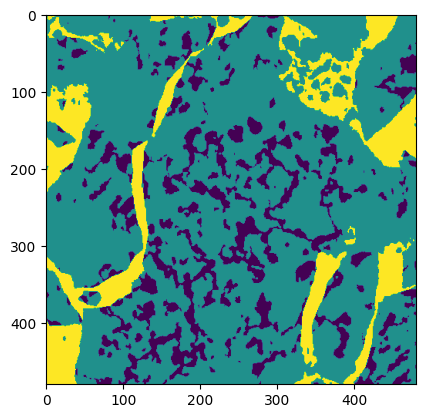

In [62]:
plt.imshow(orig_array[0])

In [80]:
# positive : 75
# negative : 255

for idx, f in enumerate(points_array):
    print(f.shape)
    print(np.unique(f))
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            # eliminate border points
            if f[i,j] == 255 and i != 479 and j != 479:
                # if all four (direct) neighbours are ponds, label as positive
                # (disregard border pixels of a class, because those are sometimes too noisy)
                if f[i+1,j] == 0 and f[i,j+1] == 0 and f[i-1,j] == 0 and f[i,j-1] == 0:
                    points_array[idx,i,j] = 255
                elif f[i+1,j] == 1 and f[i,j+1] == 1 and f[i-1,j] == 1 and f[i,j-1] == 1:
                    print("juhu")
                    points_array[idx,i,j] = 125
                elif f[i+1,j] == 2 and f[i,j+1] == 2 and f[i-1,j] == 2 and f[i,j-1] == 2:
                    print("juhu")
                    points_array[idx,i,j] = 125
                else:
                    points_array[idx,i,j] = orig_array[idx,i,j]
            else:
                points_array[idx,i,j] = orig_array[idx,i,j]
    cv2.imwrite(os.path.join(dual_path, '{}.png'.format(idx)), points_array[idx])

(480, 480)
[  0   1   2 255]
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
juhu
j

In [106]:
np_path = "E:/polar/code/sam/arrays/"

coord_pos = []
coord_neg = []

for idx, f in enumerate(points_array):
    coord_pos = []
    coord_neg = []
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if f[i,j] == 255:
                coord_pos.append([i,j])
            elif f[i,j] == 125:
                coord_neg.append([i,j])
    coord_pos = np.array(coord_pos)
    coord_neg = np.array(coord_neg)
    nr_pos = coord_pos.shape[0]
    nr_neg = coord_neg.shape[0]
    tot = nr_pos + nr_neg
    diff = tot - 540

    coord_new = coord_neg
    
    indices_to_delete = random.sample(range(coord_neg.shape[0]), diff)
    print(indices_to_delete)

    # Sort the indices in descending order so that we can delete elements from the end of the array first
    indices_to_delete.sort(reverse=True)

    # Delete elements from the array
    for index in indices_to_delete:
        coord_neg = np.delete(coord_neg, index, 0)

    print(coord_pos.shape[0] + coord_neg.shape[0])

    np.save(os.path.join(np_path, '{}_pos.npy'.format(idx)), coord_pos)
    np.save(os.path.join(np_path, '{}_neg.npy'.format(idx)), coord_neg)

[342, 158, 245, 201, 288, 406, 243, 296, 341, 381, 429, 463, 170, 403, 78, 147, 376, 137, 332, 34, 460, 349, 209, 326, 351, 318, 225, 224, 46, 417, 38, 12, 41, 54, 428, 346, 198, 62, 510, 453, 162, 135, 397, 195, 45, 409]
540
[418, 457, 139, 89, 505, 491, 145, 158, 138, 105, 306, 277, 320, 510, 409, 475, 117, 266, 108, 483, 465, 3, 75, 235, 394, 331, 447, 403, 301, 396, 265, 180, 193, 438, 77, 313, 246, 34, 460, 406, 388, 118, 342, 122, 426, 563, 453, 362, 18, 506, 560, 419, 367, 390, 288, 434, 204, 340, 454, 558, 466, 212, 214, 576, 371, 96, 240, 538, 167, 210, 39, 555, 440, 324, 553, 603, 276, 283, 280, 484, 64, 299, 227, 249, 305, 190, 383, 11, 597, 588, 248, 515, 368, 220, 581, 327, 352, 349, 357, 575, 150, 226, 444]
540
[311, 279, 150, 234, 434, 427, 502, 240, 262, 108, 197, 356, 23, 44, 368, 376, 335, 445, 222, 186, 452, 106, 237, 195, 241, 208, 378, 144, 479, 167, 252, 99, 242, 104, 459, 169, 178, 181, 54, 132, 139, 263, 296, 224, 506, 161, 30, 236, 275, 332, 73, 423, 155, 464, 

In [109]:
# masks to binary

multi = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_ma_extended.npy')

print(np.unique(multi))
multi[multi==1] = 2
print(np.unique(multi))

np.save('E:/polar/code/sam/arrays/msks_bin.npy', multi)

[0 1 2]
[0 2]


In [90]:
test = np.load(os.path.join(np_path, '0_pos.npy'))
print(test[5])
print(type(test[5]))

new = [test[5,0], test[5,1]]

print(new)
print(type(new))

[ 96 474]
<class 'numpy.ndarray'>
[96, 474]
<class 'list'>


In [92]:
convert = lambda x: [x[0], x[1]]
end_data = [convert(test[i]) for i in range(0, len(test))]

In [93]:
print(end_data[5])

[96, 474]
